In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\17097\Documents\Memorial University\CS 4304\datasets\olympic_athletes.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df_q1 = df[(df.Year == 2016) & (df.Medal == "Gold")][['ID', 'Sport', 'Height']].drop_duplicates(subset = ['ID']) #.groupby('Event')

In [5]:
df_q1.shape

(618, 3)

In [6]:
sports = ['Swimming', 'Wrestling', 'Fencing', 'Athletics', 'Shooting', 'Cycling', 'Rowing', 'Gymnastics']

df_q1 = df_q1[df_q1.Sport.isin(sports)]

In [7]:
df_q1.shape

(255, 3)

## Question 1

Text(0.5, 1.0, 'Gold-medal Winning Heights at the 2016 Olympics')

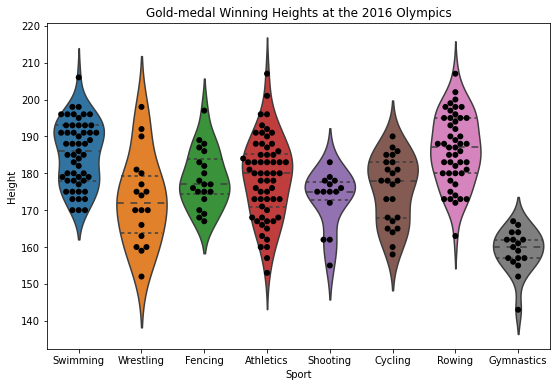

In [8]:
fig, ax = plt.subplots(figsize = (9,6))

sns.violinplot(x='Sport', y='Height', data=df_q1, scale = 'width', inner = 'quartiles', ax=ax)
sns.swarmplot(x='Sport', y='Height', data=df_q1, color='black', ax=ax, size=6)

plt.title("Gold-medal Winning Heights at the 2016 Olympics")

In [9]:
data_bins_w = []
bin_labels_w = []

for i in range(20,145,5):
    
    data_bins_w.append(i)
    
for i in range(25,145,5):
    bin_labels_w.append(str(i))

In [10]:
data_bins_h = []
bin_labels_h = []

for i in range(130,225,5):
    
    data_bins_h.append(i)
    
for i in range(135,225,5):
    bin_labels_h.append(str(i))

In [11]:
df_q2 = df[((df.Year >= 2000) & (df.Year <= 2016)) & (df.Medal == "Gold")][['Sex', 'Sport', 'Height', 'Weight']].dropna()#.reset_index()
df_q2 = df_q2[df_q2.Sport.isin(sports)].reset_index()
del df_q2['index']
df_q2.head()

,Sex,Sport,Height,Weight
0,M,Rowing,188.0,96.0
1,M,Wrestling,167.0,55.0
2,M,Athletics,166.0,58.0
3,M,Cycling,180.0,68.0
4,M,Cycling,180.0,68.0


In [12]:
df_q2['Binned_H'] = pd.cut(df_q2.Height, bins = data_bins_h, labels = bin_labels_h)
df_q2['Binned_W'] = pd.cut(df_q2.Weight, bins = data_bins_w, labels = bin_labels_w)
#df_q2

In [13]:
df_q2_swim = df_q2[df_q2.Sport == 'Swimming']
df_q2_wres = df_q2[df_q2.Sport == 'Wrestling']
df_q2_fen = df_q2[df_q2.Sport == 'Fencing']
df_q2_athl = df_q2[df_q2.Sport == 'Athletics']
df_q2_shoot = df_q2[df_q2.Sport == 'Shooting']
df_q2_cycl = df_q2[df_q2.Sport == 'Cycling']
df_q2_row = df_q2[df_q2.Sport == 'Rowing']
df_q2_gymn = df_q2[df_q2.Sport == 'Gymnastics']

In [14]:
df_q2_comb = df_q2.groupby(['Binned_H', 'Binned_W']).size()
df_comb = df_q2_comb.to_frame(name = 'count').reset_index()
df_comb = df_comb.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [15]:
df_q2_swim = df_q2_swim.groupby(['Binned_H', 'Binned_W']).size()
df_swim = df_q2_swim.to_frame(name = 'count').reset_index()
df_swim = df_swim.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [16]:
df_q2_wres = df_q2_wres.groupby(['Binned_H', 'Binned_W']).size()
df_wres = df_q2_wres.to_frame(name = 'count').reset_index()
df_wres = df_wres.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [17]:
df_q2_fen = df_q2_fen.groupby(['Binned_H', 'Binned_W']).size()
df_fen = df_q2_fen.to_frame(name = 'count').reset_index()
df_fen = df_fen.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [18]:
df_q2_athl = df_q2_athl.groupby(['Binned_H', 'Binned_W']).size()
df_athl = df_q2_athl.to_frame(name = 'count').reset_index()
df_athl = df_athl.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [19]:
df_q2_shoot = df_q2_shoot.groupby(['Binned_H', 'Binned_W']).size()
df_shoot = df_q2_shoot.to_frame(name = 'count').reset_index()
df_shoot = df_shoot.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [20]:
df_q2_cycl = df_q2_cycl.groupby(['Binned_H', 'Binned_W']).size()
df_cycl = df_q2_cycl.to_frame(name = 'count').reset_index()
df_cycl = df_cycl.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [21]:
df_q2_row = df_q2_row.groupby(['Binned_H', 'Binned_W']).size()
df_row = df_q2_row.to_frame(name = 'count').reset_index()
df_row = df_row.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [22]:
df_q2_gymn = df_q2_gymn.groupby(['Binned_H', 'Binned_W']).size()
df_gymn = df_q2_gymn.to_frame(name = 'count').reset_index()
df_gymn = df_gymn.pivot(index = 'Binned_H', columns = 'Binned_W', values = 'count')

In [23]:
sport_dict = {'Swimming': df_swim, 
              'Wrestling': df_wres, 
              'Fencing': df_fen, 
              'Athletics': df_athl,
              'Shooting': df_shoot,
              'Cycling': df_cycl,
              'Rowing': df_row,
              'Gymnastics': df_gymn,
              'Combined': df_comb}

In [24]:
sports_q2 = ['Swimming', 'Wrestling', 'Fencing', 'Athletics', 'Shooting', 'Cycling', 'Rowing', 'Gymnastics', 'Combined']

## Question 2

In [25]:
def interactive_plot(sport, kde, display_data):
    
    if((kde == False) & (display_data == False)):
        
        df_hm = sport_dict[sport]
        ax = sns.heatmap(data = df_hm, cmap = 'Blues', cbar = False)
        ax.set_ylabel("Height")
        ax.set_xlabel("Weight")
        ax.invert_yaxis()
        
    elif((kde == True) & (display_data == False)):
        
        if (sport != 'Combined'):
            df_kde = df_q2[df_q2.Sport == sport]
            
        else:
            df_kde = df_q2

        
        ax = sns.kdeplot(x = 'Weight', y = 'Height', data = df_kde, level = 5, fill = True, palette = 'Blues')
        ax.set_xlim(20,140)
        ax.set_ylim(130,220)
        
    elif((kde == True) & (display_data == True)):
        
        if (sport != 'Combined'):
            df_kde = df_q2[df_q2.Sport == sport]
            
        else:
            df_kde = df_q2
    
        #df_kde = df_q2[df_q2.Sport == sport]
        ax = sns.kdeplot(x = 'Weight', y = 'Height', data = df_kde, level = 5, fill = True, palette = 'Blues')
        ax = sns.scatterplot(x = 'Weight', y = 'Height', data = df_kde, hue = 'Sex')
        plt.legend(loc='upper right', title = 'Sex')
        ax.set_xlim(20,140)
        ax.set_ylim(130,220)
        
    else:
        
        if (sport != 'Combined'):
            df_scat = df_q2[df_q2.Sport == sport]
            
        else:
            df_scat = df_q2
        
        #df_scat = df_q2[df_q2.Sport == sport]
        ax = sns.scatterplot(x = 'Weight', y = 'Height', data = df_scat, hue = 'Sex')
        plt.legend(loc='upper right', title = 'Sex')
        ax.set_xlim(20,140)
        ax.set_ylim(130,220)
    
interact(interactive_plot, 
         sport = widgets.Dropdown(options= sports_q2, description='Sport'),
         kde = widgets.Checkbox(value = False, description = 'kde'),
         display_data = widgets.Checkbox(value = False, description = 'display_data')
         )

interactive(children=(Dropdown(description='Sport', options=('Swimming', 'Wrestling', 'Fencing', 'Athletics', …

<function __main__.interactive_plot(sport, kde, display_data)>